# One class SVM for Anomaly Detection

In [652]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import util
import importlib
import pywt

importlib.reload(util)

<module 'util' from '/Users/stan/Desktop/UCU/linear-algebra/course-project/util.py'>

Prototyping of the intrusion detection system, based on the BCCC-CIC-IDS-2017 dataset.

In [654]:
# Load the data

data = util.read_all_files()

data['timestamp'] = pd.to_datetime(data['timestamp'], format='mixed')
data = data.set_index('timestamp')
data = data.sort_index()

# Main

In [663]:
normal_traffic_df = data[data['label'] == 'Benign'].loc['2017-07-05']


In [664]:
print(data.loc['2017-07-07'].label.value_counts())

label
Benign         364102
Port_Scan      161323
DDoS_LOIT       95733
Botnet_ARES      5508
Name: count, dtype: int64


In [665]:
normal_traffic_df.label.value_counts()

label
Benign    397053
Name: count, dtype: int64

In [666]:
data_scaler = StandardScaler()

dwt_df, _ = util.preprocess(normal_traffic_df, data_scaler.fit_transform, all=True)
# dwt2_df, _ = util.preprocess(data[data['label'] == 'Benign'].loc['2017-07-05'], data_scaler.transform)


# dwt_df = pd.concat([dwt_df, dwt2_df]).reset_index(drop=True)

dwt_df

       dst_host_port  payload_bytes_std  dst_port_category_web  \
0           1.201275          -0.852900              -0.410253   
1           0.660892          -0.852900              -0.508367   
2          -0.419873          -0.852900              -0.410253   
3          -0.554969           1.172471              -0.508367   
4          -0.554969           1.172471              -0.508367   
...              ...                ...                    ...   
30448      -0.690065           1.172471              -0.508367   
30449      -0.690065           1.172471              -0.508367   
30450      -0.690065           1.172471              -0.508367   
30451      -0.690065           1.172471              -0.508367   
30452      -0.554969          -0.852900              -0.508367   

       syn_flag_counts  
0            -0.409635  
1             0.348201  
2            -0.409635  
3            -0.409635  
4            -0.409635  
...                ...  
30448        -0.409635  
30449  

,dst_port_category_web_approx,dst_port_approx,fwd_total_payload_bytes_approx,bwd_rst_flag_counts_approx
0,0.283194,0.069406,-0.429188,-0.215399
1,0.355238,-0.422235,-0.691995,0.085478
2,-0.159369,-0.502250,-0.529741,-0.186860
3,-0.319572,0.069999,-0.145673,-0.535244
4,-0.304217,0.551454,0.159392,-0.696279
...,...,...,...,...
30447,-0.315723,0.414774,0.097925,-0.632572
30448,-0.315723,0.414774,0.097925,-0.632572
30449,-0.315723,0.414774,0.097925,-0.632572
30450,-0.387898,0.463873,0.171744,-0.680027


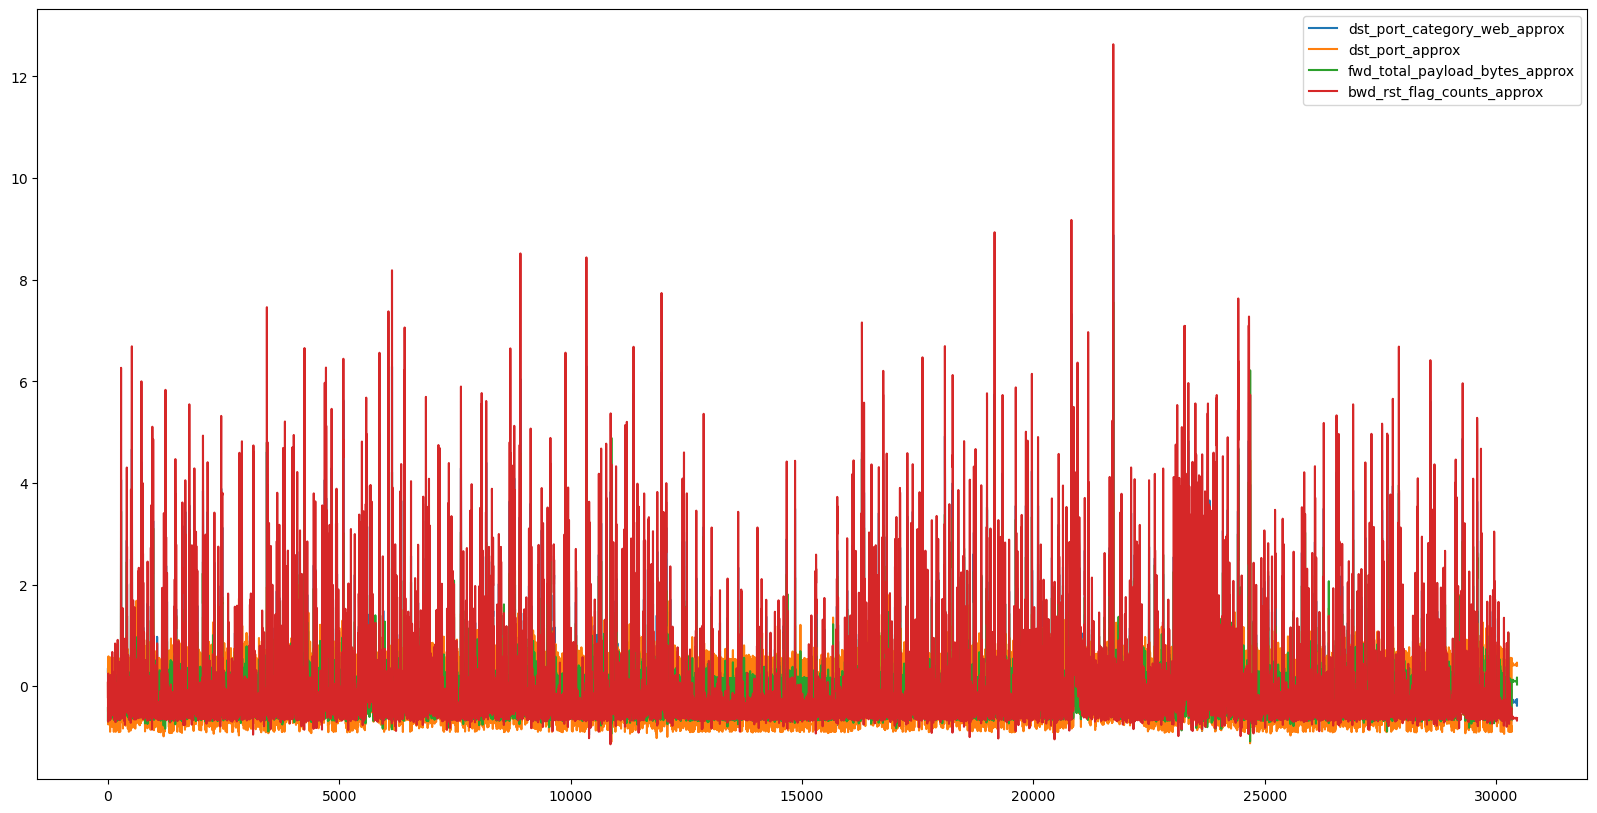

In [667]:
plt.figure(figsize=(20, 10))
plt.plot(dwt_df)
plt.legend(dwt_df.columns)
plt.show()

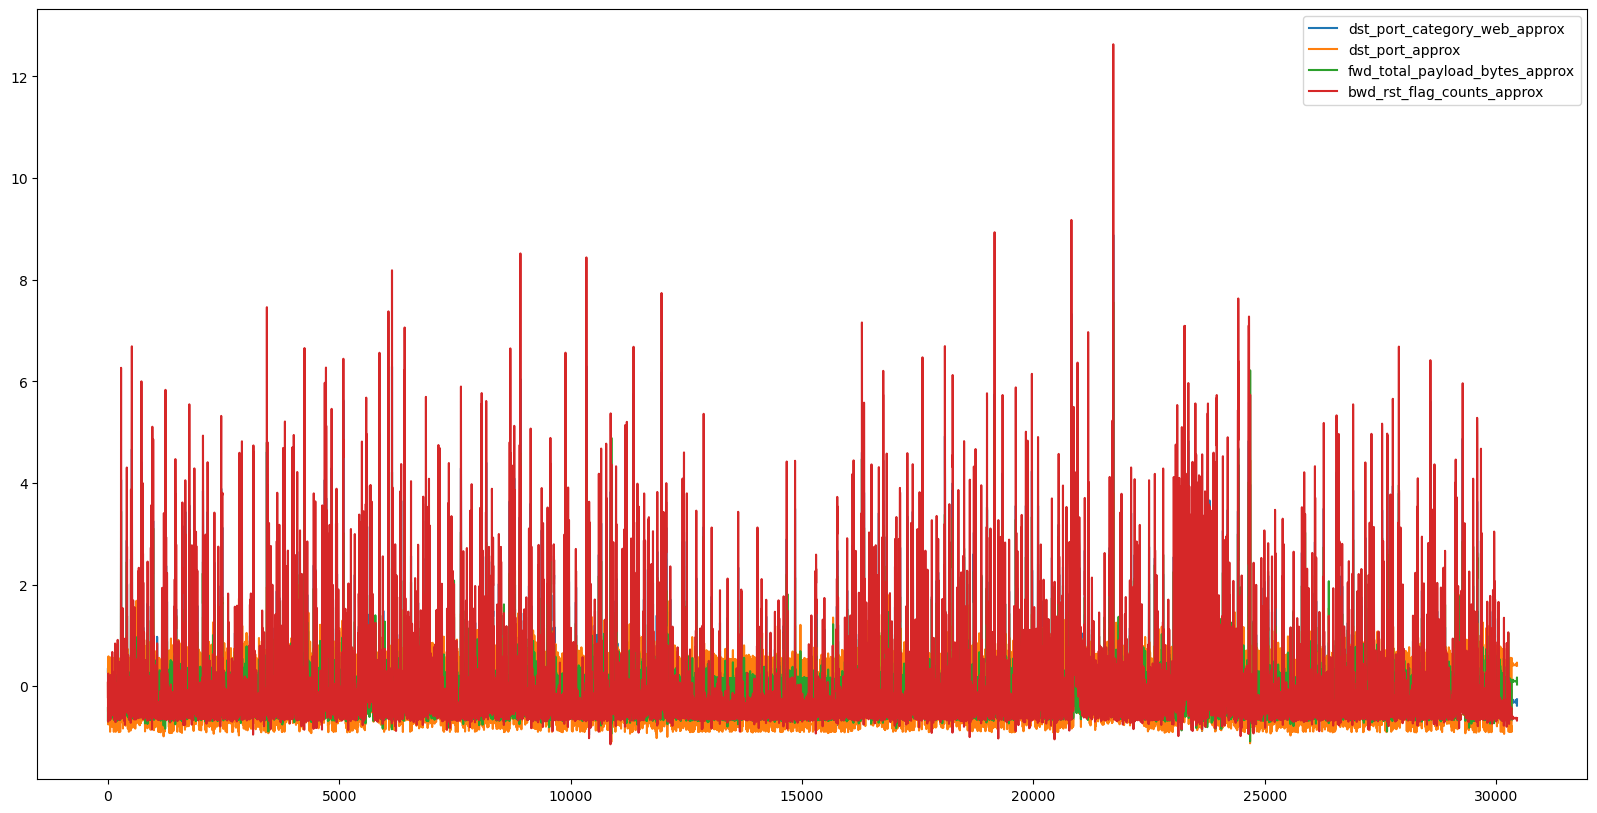

label
Benign      397053
DoS_Hulk    349240
Name: count, dtype: int64
Filtering only internal traffic
       dst_host_port  payload_bytes_std  dst_port_category_web  \
0           0.120509          -0.852900              -0.508367   
1          -0.149682          -0.852900              -0.508367   
2          -0.554969          -0.852900              -0.508367   
3          -0.690065          -0.852900              -0.508367   
4          -0.690065          -0.852900              -0.508367   
...              ...                ...                    ...   
30448      -0.690065           1.172471              -0.508367   
30449      -0.690065           1.172471              -0.508367   
30450      -0.690065           1.172471              -0.508367   
30451      -0.690065           1.172471              -0.508367   
30452      -0.554969          -0.852900              -0.508367   

       syn_flag_counts  
0            -0.409635  
1             0.348201  
2            -0.409635  
3    

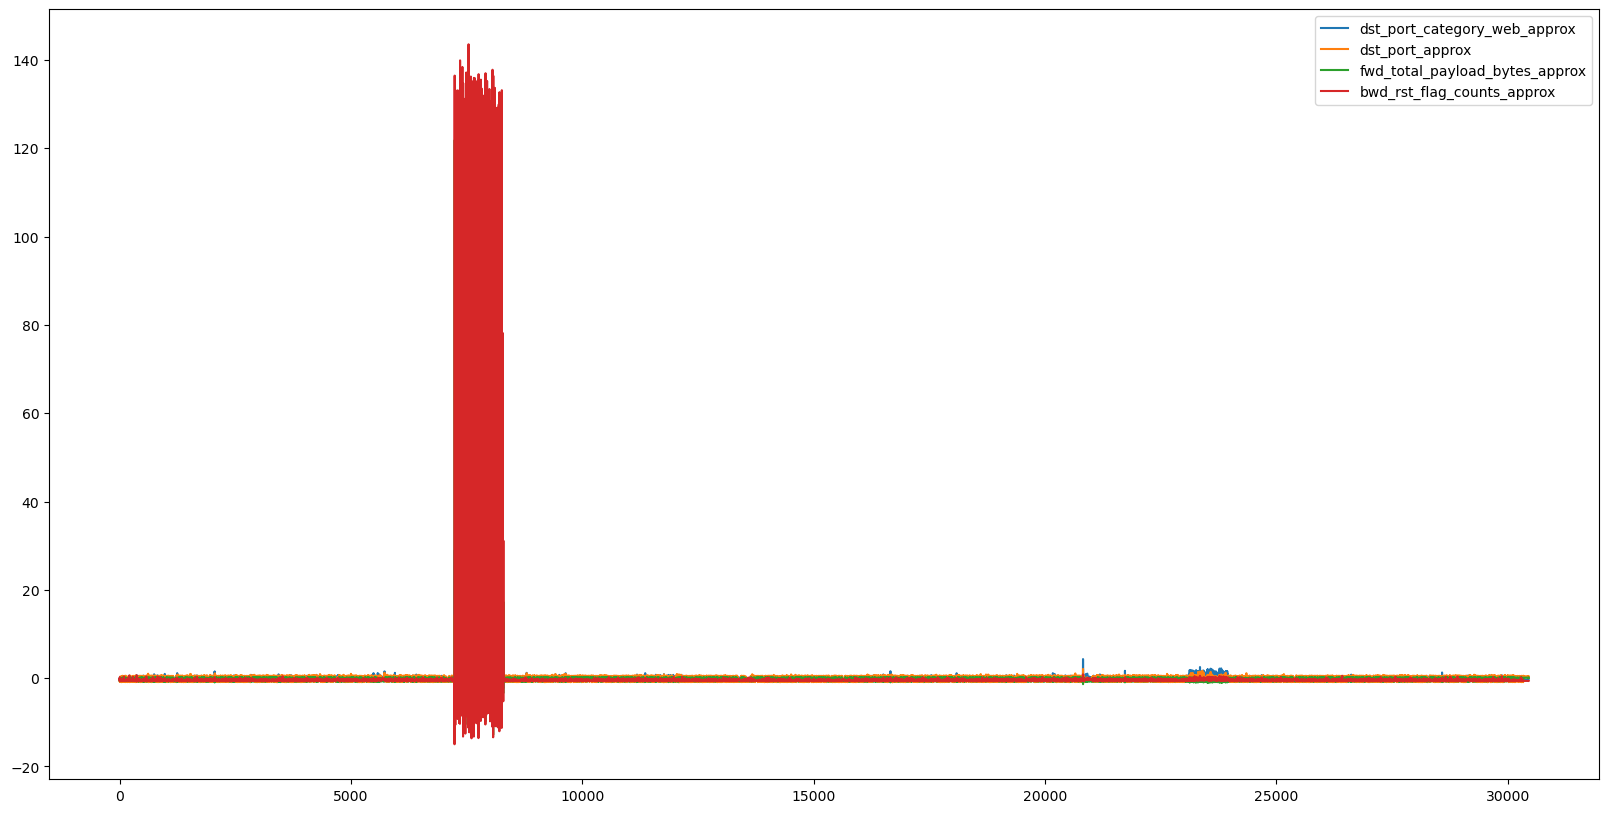

,dst_port_category_web_approx,dst_port_approx,fwd_total_payload_bytes_approx,bwd_rst_flag_counts_approx
0,-0.159133,-0.196340,-0.389083,-0.351877
1,-0.118173,-0.613259,-0.579244,-0.084158
2,-0.391921,-0.716615,-0.576932,-0.252238
3,-0.609441,-0.767490,-0.597974,-0.439925
4,-0.731664,-0.807257,-0.601612,-0.526018
...,...,...,...,...
30447,-0.315723,0.414774,0.097925,-0.632572
30448,-0.315723,0.414774,0.097925,-0.632572
30449,-0.315723,0.414774,0.097925,-0.632572
30450,-0.330222,0.499070,0.168005,-0.661287


<Figure size 2000x1000 with 0 Axes>

In [668]:
from sklearn.ensemble import IsolationForest
import optuna
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Scale the data
X = dwt_df

plt.figure(figsize=(20, 10))
plt.plot(X)
plt.legend(dwt_df.columns)
plt.show()

def data_by_date_and_labels(data, date, labels = None):
    if labels is None:
        return data.loc[date]
    return data.loc[date].loc[data.loc[date].label.isin(labels)]

# Load malicious data
mal_df = data_by_date_and_labels(data, '2017-07-05', ['Benign', 'DoS_Hulk'])
# mal_df = data_by_date_and_labels(data, '2017-07-05', ['DoS_Hulk'])
# mal_df = data_by_date_and_labels(data, '2017-07-07', ['Benign', 'DDoS_LOIT', 'Port_Scan'])
# , 'Botnet_ARES'
# mal_df = data_by_date_and_labels(data, '2017-07-05')

print(mal_df.label.value_counts())

X_test, y_true = util.preprocess(mal_df, data_scaler.transform, all=False)

plt.figure(figsize=(20, 10))
# plt.plot(X_test['fwd_total_payload_bytes_rolling_variance'])
plt.plot(X_test)
plt.legend(dwt_df.columns)
plt.show()

display(X_test)

plt.figure(figsize=(20, 10))
# plt.legend(dwt_df.columns)
plt.show()

# Isolation Forest for Anomaly Detection

[I 2025-02-13 13:13:07,093] A new study created in memory with name: no-name-cdc257f0-892a-4877-a001-f80ef1b87ea8


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-02-13 13:13:07,916] Trial 3 finished with value: 0.3209509658246657 and parameters: {'contamination': 0.1358694899038187}. Best is trial 3 with value: 0.3209509658246657.
[I 2025-02-13 13:13:07,919] Trial 6 finished with value: 0.3246231155778894 and parameters: {'contamination': 0.13497049184926682}. Best is trial 6 with value: 0.3246231155778894.
[I 2025-02-13 13:13:07,920] Trial 1 finished with value: 0.440467997247075 and parameters: {'contamination': 0.11794179957918365}. Best is trial 1 with value: 0.440467997247075.
[I 2025-02-13 13:13:07,920] Trial 5 finished with value: 0.44002741603838247 and parameters: {'contamination': 0.11828220082881777}. Best is trial 1 with value: 0.440467997247075.
[I 2025-02-13 13:13:07,929] Trial 2 finished with value: 0.5650623885918004 and parameters: {'contamination': 0.08163250381676936}. Best is trial 2 with value: 0.5650623885918004.
[I 2025-02-13 13:13:07,942] Trial 7 finished with value: 0.31334622823984526 and parameters: {'contamin

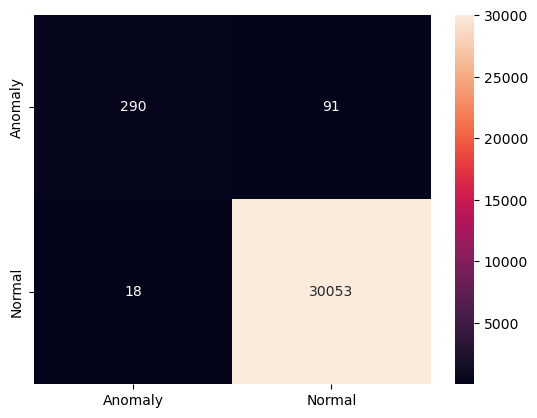

In [669]:
# # one class svm

# # from math import gamma
# from sklearn.svm import OneClassSVM

# scaler = StandardScaler()
# X = scaler.fit_transform(dwt_df)

# X_test = util.preprocess(data.loc['2017-07-07'])
# X_test = scaler.transform(X_test)


# from matplotlib.pyplot import show

        # 'fwd_total_payload_bytes_approx',
        # 'fwd_total_payload_bytes_detail',
        # 'dst_port_category_web_approx',
        # 'dst_port_category_web_detail',
        # 'dst_port_approx',
        # 'dst_port_detail',
        # 'bwd_rst_flag_counts_approx', 
        # 'bwd_rst_flag_counts_detail'

y_true = y_true.reset_index(drop=True)

def objective(trial):
    c = trial.suggest_float("contamination", 0.001, 0.2)  # Contamination

    clf = IsolationForest(contamination=c, bootstrap=True, random_state=3123)
    clf.fit(X)

    y_pred = clf.predict(X_test)

    return f1_score(y_true, y_pred, average="binary", pos_label=-1)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, n_jobs=8, show_progress_bar=True)

print("Best Parameters:", study.best_params)

print("best score:", study.best_value)

clf = IsolationForest(contamination=study.best_params['contamination'], bootstrap=True, random_state=3123)

clf.fit(X)

y_pred = clf.predict(X_test)

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
print(classification_report(y_true, y_pred, target_names=['Anomaly', 'Normal']))

# clf = OneClassSVM(nu=0.01, gamma=10)
# clf.fit(X)

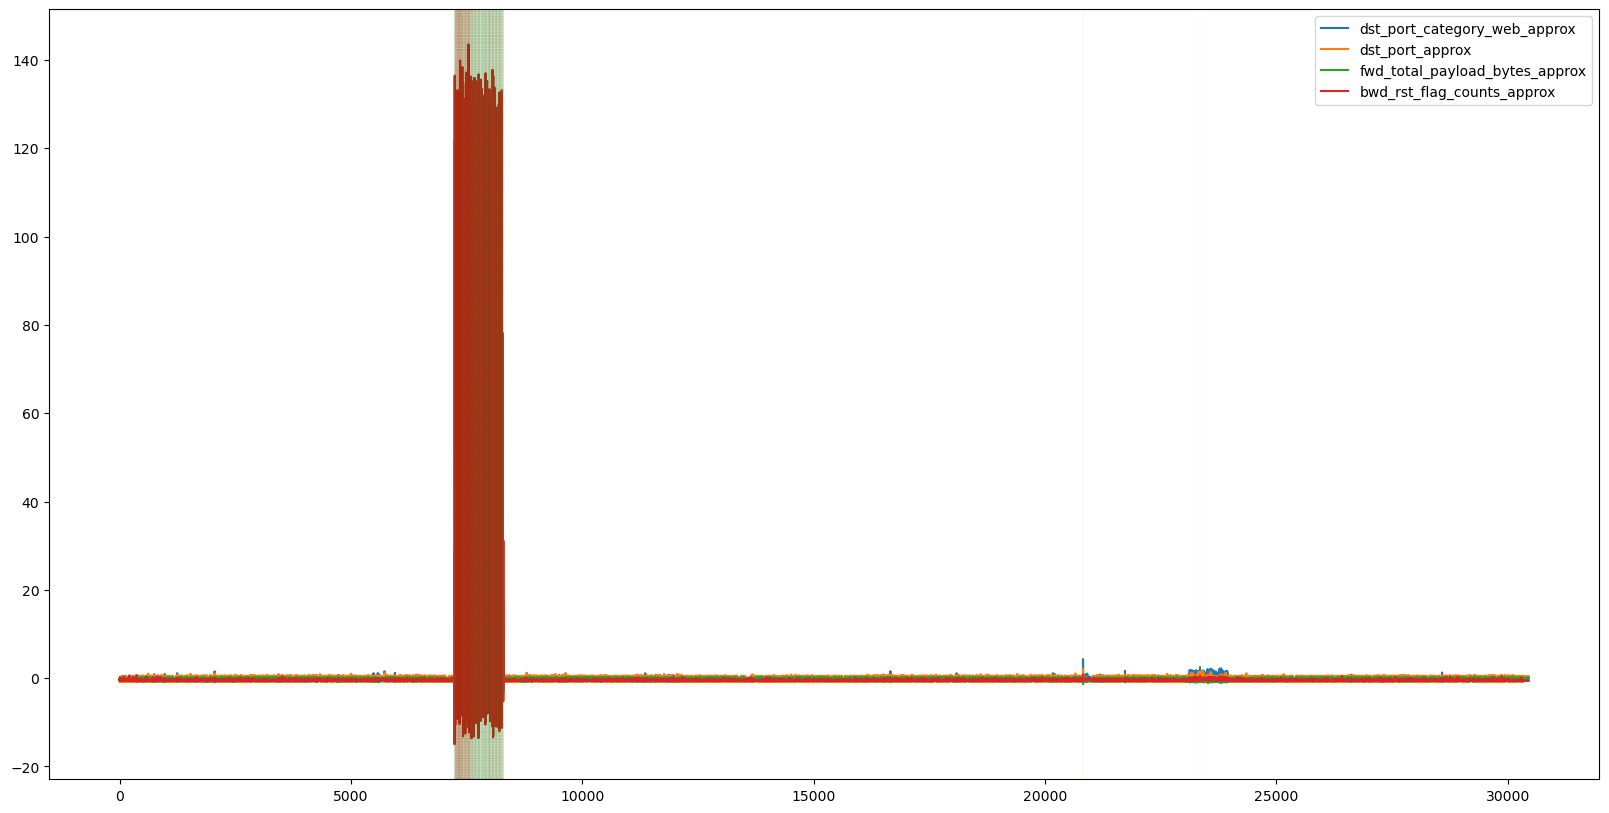

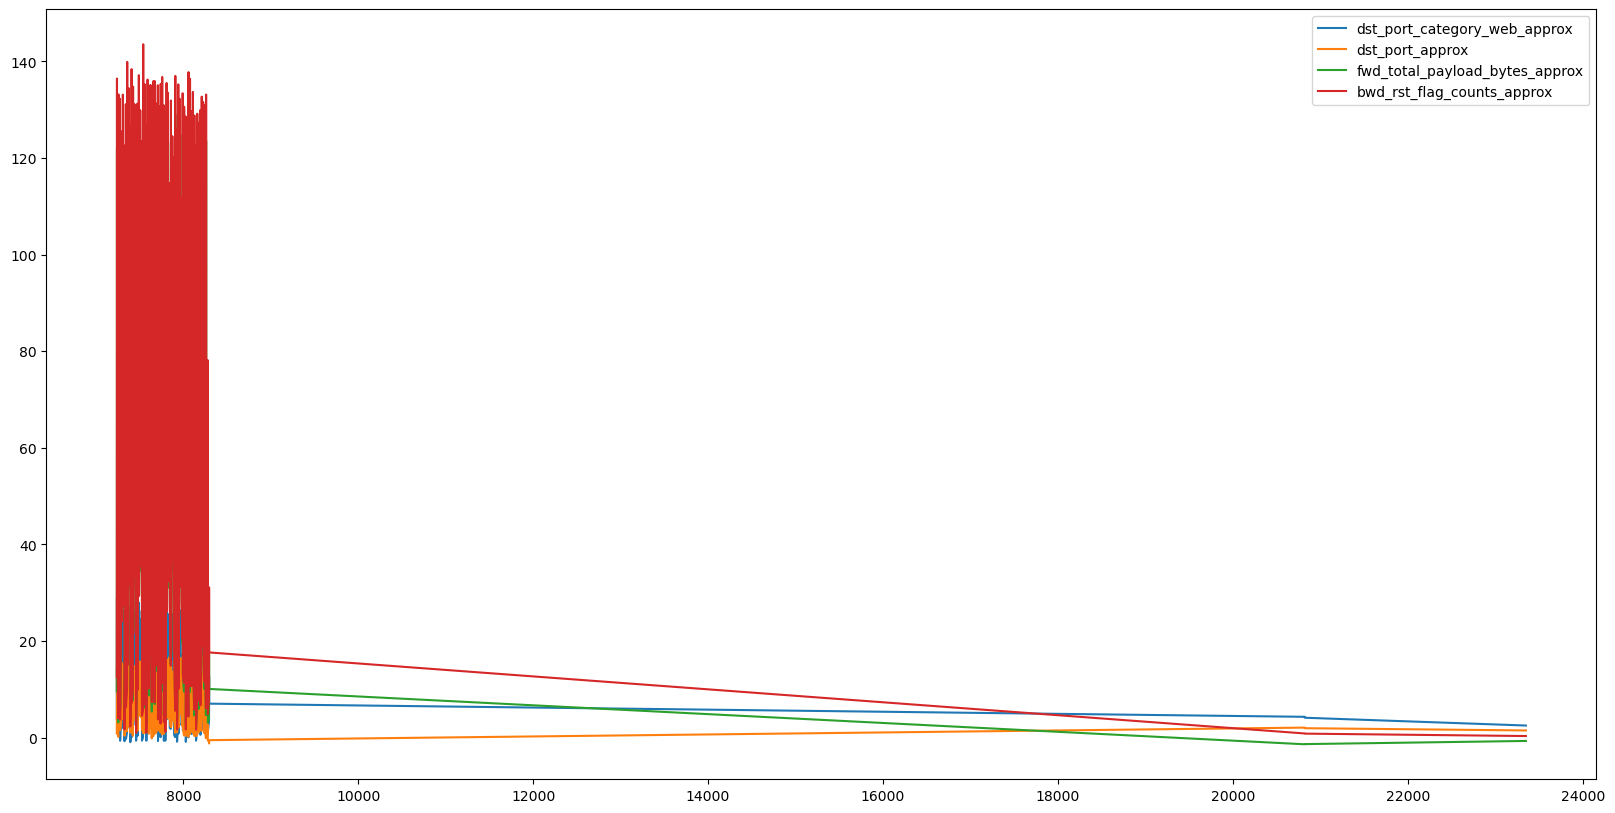

In [670]:
# plot outliers on test data

plt.figure(figsize=(20, 10))
plt.plot(X_test)

for i in X_test[y_pred == -1].index:
    if i not in y_true[y_true == -1].index:
        plt.axvline(i, 0, 1, color='y', linestyle='dashed', linewidth=0.1, alpha=0.5)
    else:
        plt.axvline(i, 0, 1, color='g', linestyle='dashed', linewidth=0.1, alpha=0.5)

for i in y_true[y_true == -1].index:
    if i not in X_test[y_pred == -1].index:
        plt.axvline(i, 0, 1, color='r', linestyle='dashed', linewidth=0.1, alpha=0.5)

plt.legend(dwt_df.columns)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(X_test[y_pred == -1])
plt.legend(dwt_df.columns)
plt.show()

# One class SVM for Anomaly Detection

[I 2025-02-13 13:13:20,211] A new study created in memory with name: no-name-dee658b8-ffa6-4452-a817-b5c9d4734739


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-02-13 13:13:20,604] Trial 1 finished with value: 0.7279503105590062 and parameters: {'nu': 0.00737682480480378, 'gamma': 0.0027096765277809564}. Best is trial 1 with value: 0.7279503105590062.
[I 2025-02-13 13:13:22,933] Trial 4 finished with value: 0.30705821741370426 and parameters: {'nu': 0.04743359560921044, 'gamma': 0.0014902480946983629}. Best is trial 1 with value: 0.7279503105590062.
[I 2025-02-13 13:13:24,017] Trial 9 finished with value: 0.5025380710659898 and parameters: {'nu': 0.02212791877383817, 'gamma': 0.009628256468251647}. Best is trial 1 with value: 0.7279503105590062.
[I 2025-02-13 13:13:24,728] Trial 2 finished with value: 0.13940520446096655 and parameters: {'nu': 0.0813724759845643, 'gamma': 0.006073043636075771}. Best is trial 1 with value: 0.7279503105590062.
[I 2025-02-13 13:13:25,018] Trial 10 finished with value: 0.49411764705882355 and parameters: {'nu': 0.020935769779119883, 'gamma': 0.0013383984919408162}. Best is trial 1 with value: 0.72795031055

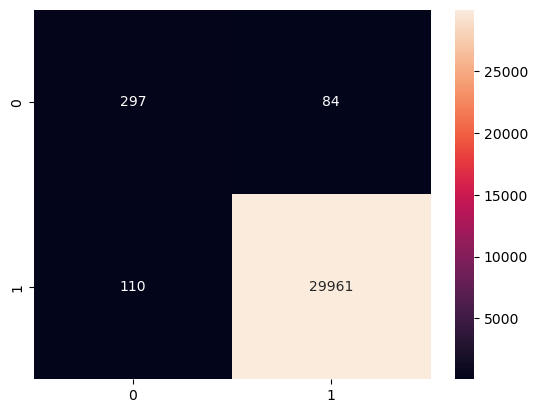

In [671]:
def objective(trial):
    clf = OneClassSVM(nu=trial.suggest_float("nu", 0.001, 0.2), kernel="rbf", cache_size=1000, gamma=trial.suggest_float("gamma", 0.001, 0.01))
    clf.fit(X)
    y_pred = clf.predict(X_test)

    return f1_score(y_true, y_pred, average="binary", pos_label=-1)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, n_jobs=8, show_progress_bar=True)

print("Best Parameters:", study.best_params)

print("best score:", study.best_value)

clf = OneClassSVM(nu=study.best_params['nu'], gamma=study.best_params['gamma'], kernel="rbf", cache_size=1000)
# clf = OneClassSVM(nu=0.05, gamma=0.1, kernel="rbf", cache_size=1000)
clf.fit(X)

y_pred = clf.predict(X_test)

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')
print(classification_report(y_true, y_pred))

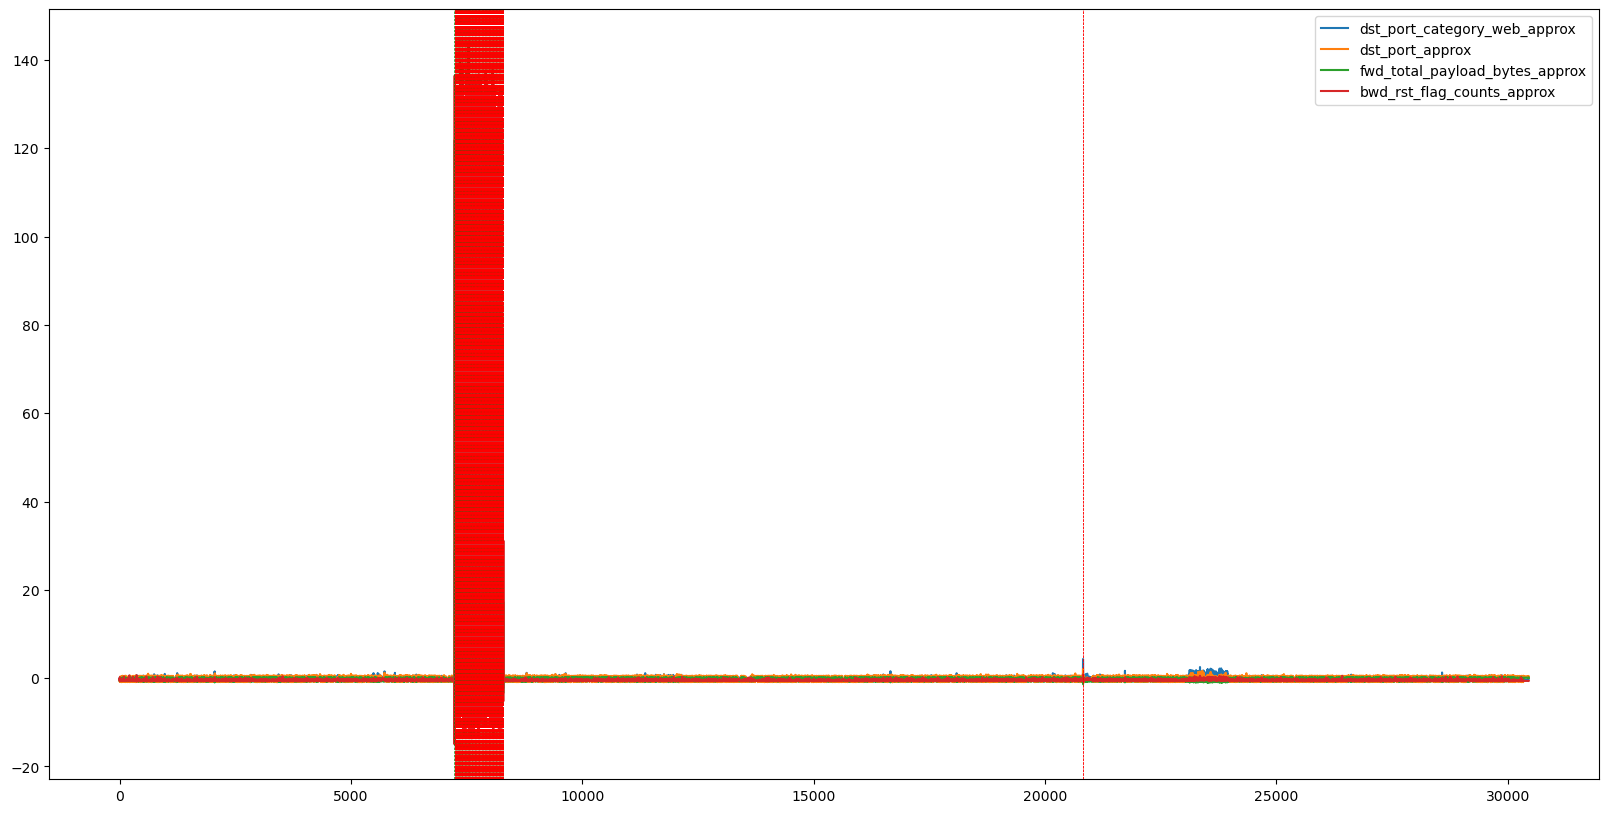

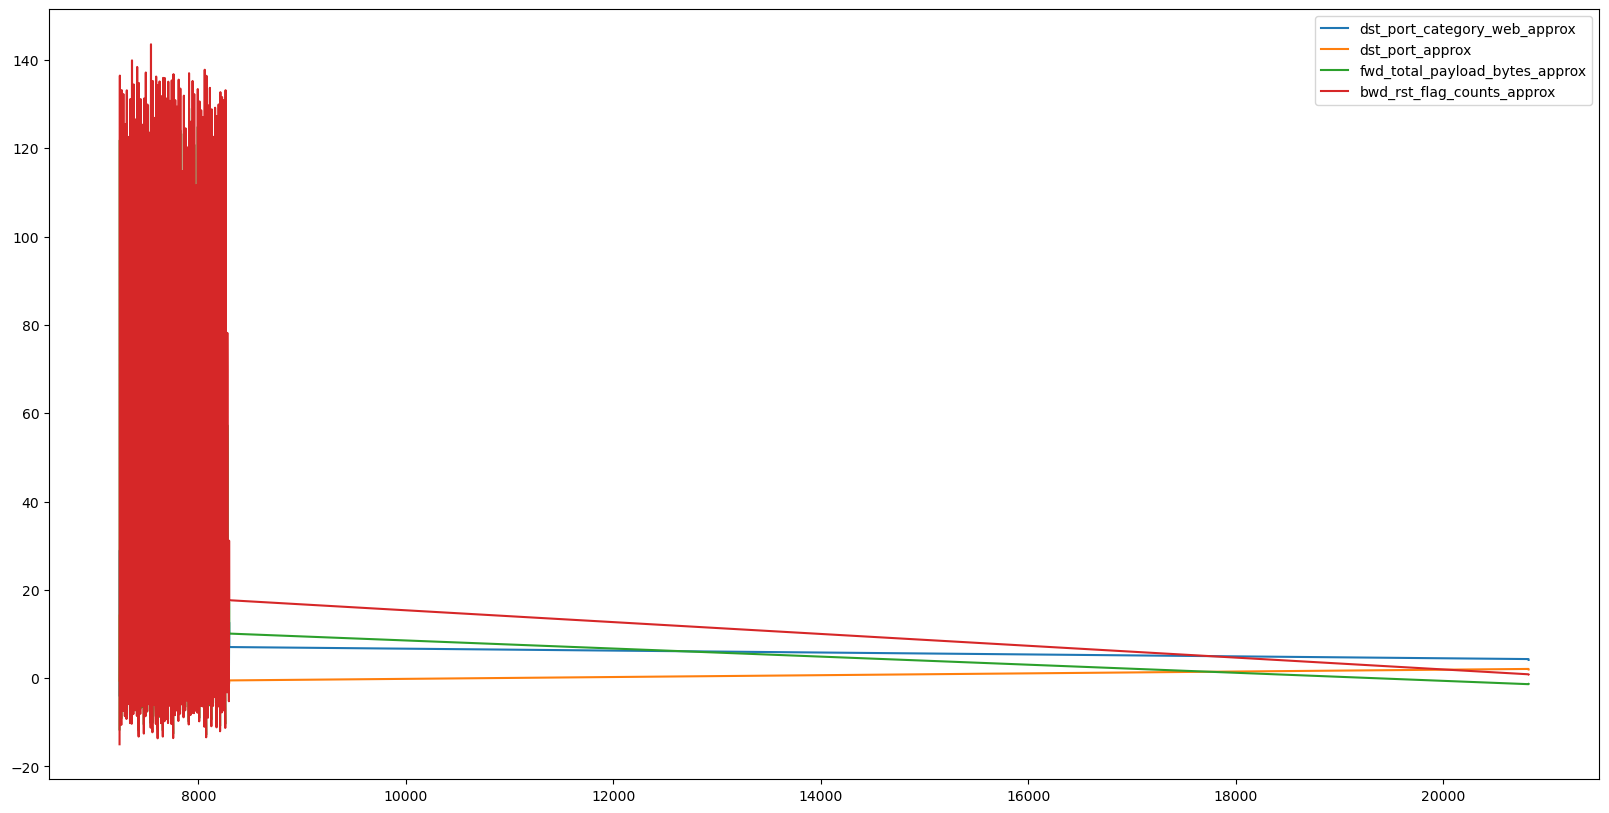

In [673]:
# plot outliers on test data

plt.figure(figsize=(20, 10))
plt.plot(X_test)

# for i in range(len(X_test[y_pred == -1])):
#     plt.axvline(, 0, 1, color='r', linestyle='dashed')

for i in y_true[y_true == -1].index:
    plt.axvline(i, 0, 1, color='g', linestyle='dashed', linewidth=0.5)

for i in X_test[y_pred == -1].index:
    plt.axvline(i, 0, 1, color='r', linestyle='dashed', linewidth=0.5)

plt.legend(dwt_df.columns)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(X_test[y_pred == -1])
plt.legend(dwt_df.columns)
plt.show()

# evaluate model

In [14]:
best_params = study.best_params
clf_optimal = OneClassSVM(nu=best_params["nu"], gamma=best_params["gamma"], kernel='rbf')
clf_optimal.fit(X)

y_pred_optimal = clf_optimal.predict(X_test)

KeyError: 'nu'

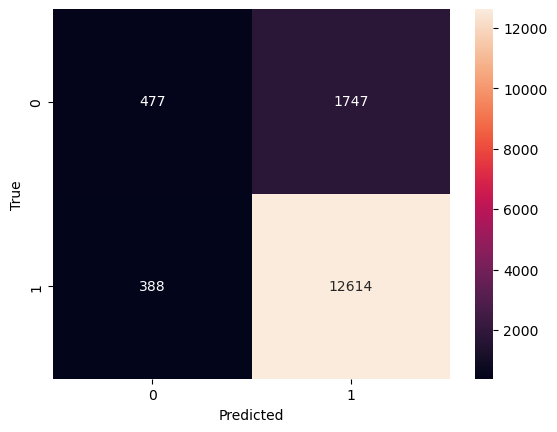

              precision    recall  f1-score   support

          -1       0.55      0.21      0.31      2224
           1       0.88      0.97      0.92     13002

    accuracy                           0.86     15226
   macro avg       0.71      0.59      0.62     15226
weighted avg       0.83      0.86      0.83     15226



In [ ]:
# classification report
from sklearn.metrics import classification_report


sns.heatmap(confusion_matrix(y_true, y_pred_optimal), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_true, y_pred_optimal))

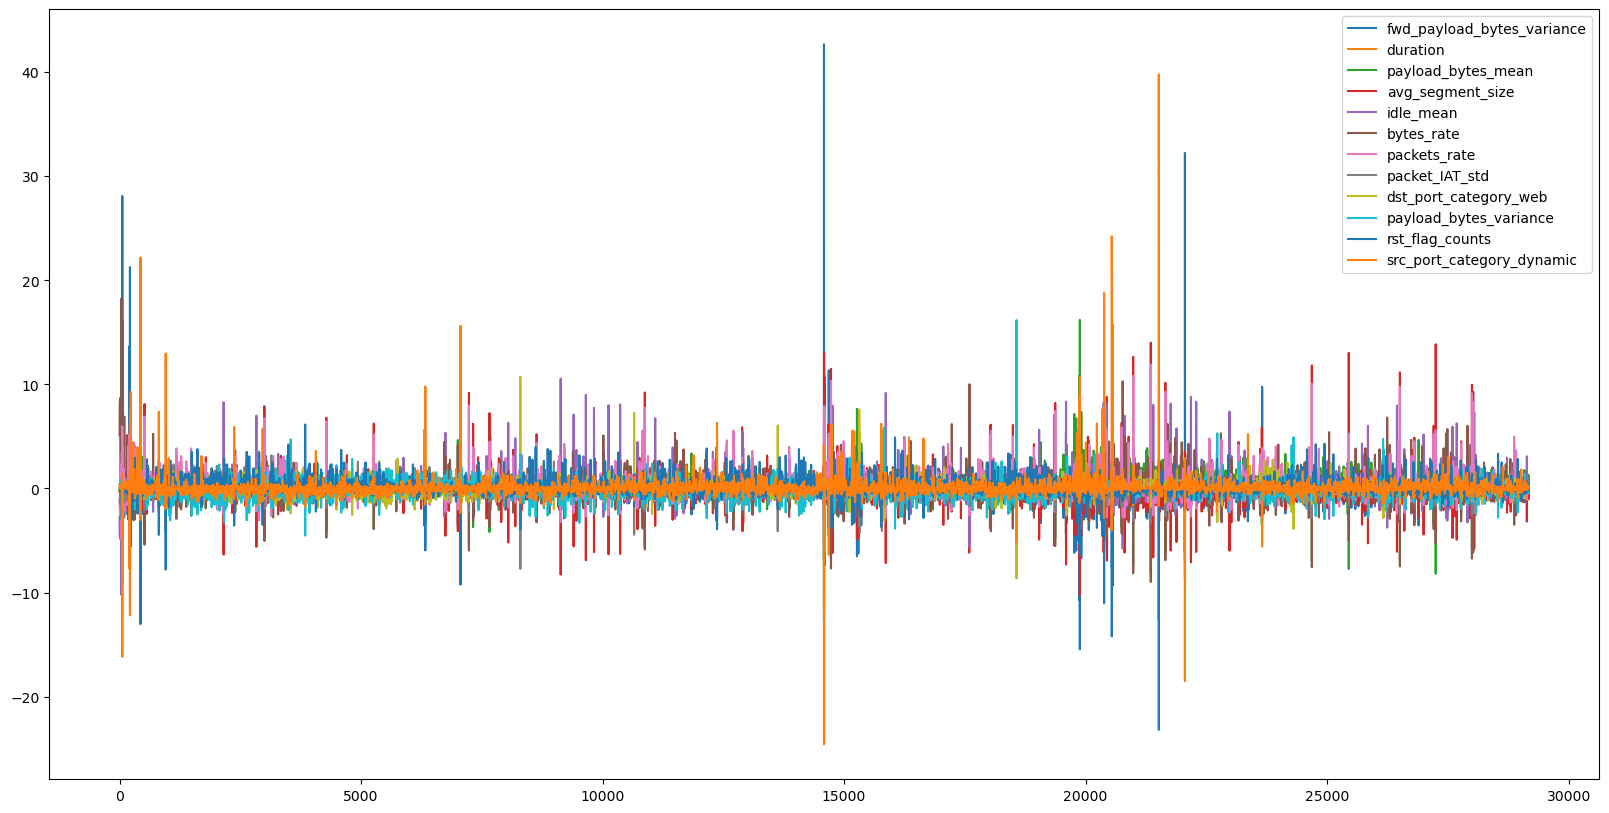

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(X)
plt.legend(dwt_df.columns)
plt.show()

# for i, column in enumerate(dwt_df.columns):
#     plt.plot(X[:, i])

#     plt.title(dwt_df.columns[i])
#     plt.show()

In [ ]:
df = data.loc['2017-07-07']

df, labels = util.preprocess(df)

X_mal = scaler.transform(df)

plt.figure(figsize=(20, 10))
plt.plot(X_mal)
plt.legend(df.columns)
plt.show()

# for i, column in enumerate(df.columns):
#     plt.plot(X[:, i])

#     plt.title(df.columns[i])
#     plt.show()

# plt.show()

TypeError: preprocess() missing 1 required positional argument: 'scaler'

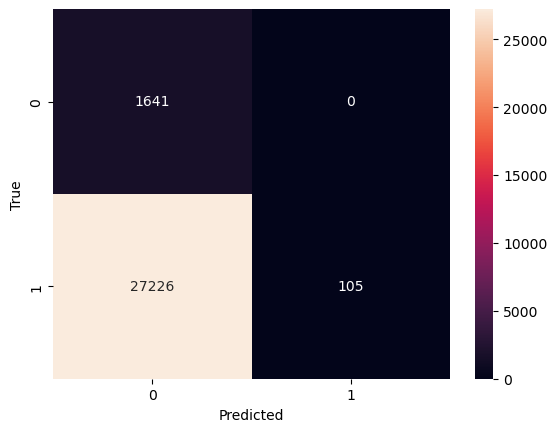

              precision    recall  f1-score   support

          -1       0.06      1.00      0.11      1641
           1       1.00      0.00      0.01     27331

    accuracy                           0.06     28972
   macro avg       0.53      0.50      0.06     28972
weighted avg       0.95      0.06      0.01     28972



In [ ]:
y_pred = clf.predict(X_mal)

# classification report
from sklearn.metrics import classification_report

sns.heatmap(confusion_matrix(labels, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(labels, y_pred))

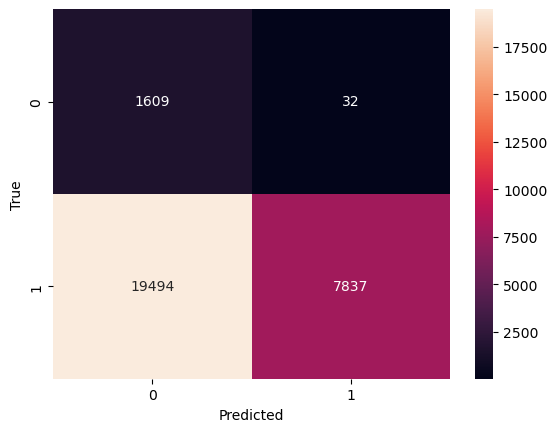

              precision    recall  f1-score   support

          -1       0.08      0.98      0.14      1641
           1       1.00      0.29      0.45     27331

    accuracy                           0.33     28972
   macro avg       0.54      0.63      0.29     28972
weighted avg       0.94      0.33      0.43     28972



In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest_clf = IsolationForest(contamination=0.01)
isolation_forest_clf.fit(X)

y_pred = clf.predict(X_mal)

# classification report
from sklearn.metrics import classification_report

sns.heatmap(confusion_matrix(labels, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(labels, y_pred))

In [ ]:
import pickle

filename = 'one_class_svm_mon.sav'
pickle.dump(clf, open(filename, 'wb'))
pickle.dump(isolation_forest_clf, open('isolation_forest_mon.sav', 'wb'))

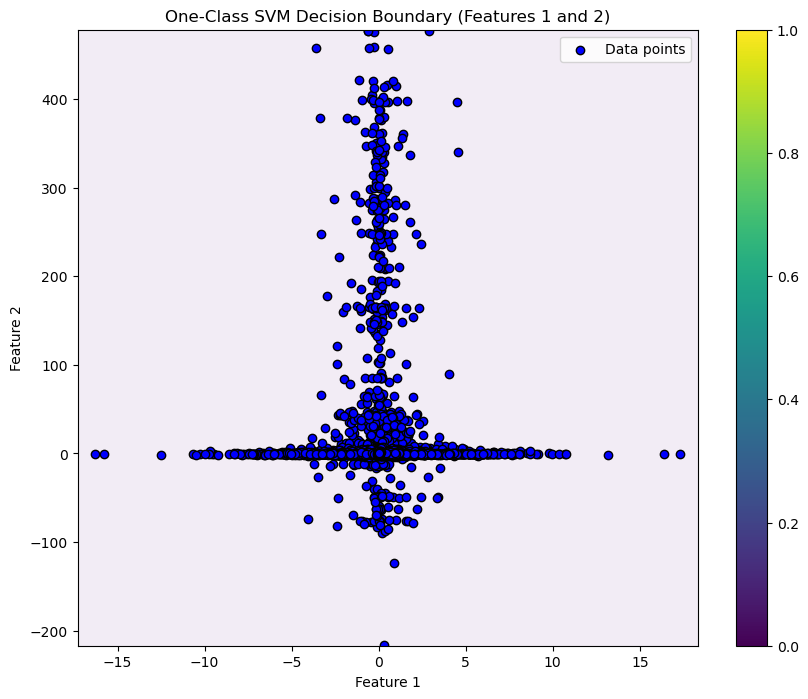

In [ ]:
feature1, feature2 = 1, 2

x_min, x_max = X[:, feature1].min() - 1, X[:, feature1].max() + 1
y_min, y_max = X[:, feature2].min() - 1, X[:, feature2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

grid_points = np.tile(X.mean(axis=0), (xx.ravel().shape[0], 1))
grid_points[:, feature1] = xx.ravel()
grid_points[:, feature2] = yy.ravel()

Z = clf.decision_function(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.scatter(X[:, feature1], X[:, feature2], c='blue', edgecolors='k', label="Data points")
plt.title(f"One-Class SVM Decision Boundary (Features {feature1} and {feature2})")
plt.xlabel(f"Feature {feature1}")
plt.ylabel(f"Feature {feature2}")
plt.legend()
plt.colorbar()
plt.show()